In [158]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon-stats/PokemonDB_with_Stage.csv


# Setup

In [159]:
data = pd.read_csv('../input/pokemon-stats/PokemonDB_with_Stage.csv', header = 0) #read from dataset
data.drop(['#', 'Name', 'Variation', 'Type1', 'Type2'], axis = 1, inplace = True)
data.head() # view first few rows of the data

# Load the Iris dataset as an example
X = data.iloc[:,: -1] # read input columns
y = data.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Logistic Regression

In [160]:
lrm = LogisticRegression(multi_class = 'ovr', max_iter = 1000)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.4789915966386555
              precision    recall  f1-score   support

           1       0.52      0.77      0.62       123
           2       0.36      0.21      0.27        85
           3       0.17      0.03      0.06        30

    accuracy                           0.48       238
   macro avg       0.35      0.34      0.32       238
weighted avg       0.42      0.48      0.42       238



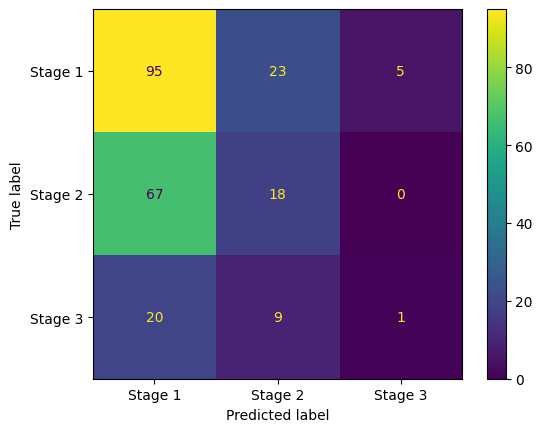

In [161]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

# Random Forest

In [162]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7521008403361344
              precision    recall  f1-score   support

           1       0.86      0.82      0.84       123
           2       0.70      0.78      0.74        85
           3       0.46      0.40      0.43        30

    accuracy                           0.75       238
   macro avg       0.67      0.67      0.67       238
weighted avg       0.75      0.75      0.75       238



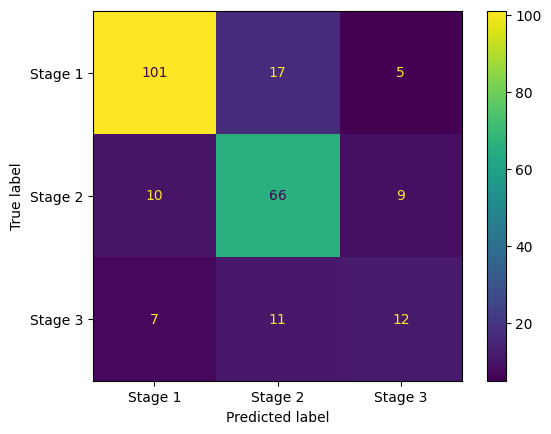

In [163]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

# Neural Networks

In [164]:
# Assuming y_train is an array of string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Ensure the encoded labels are integers
y_train_encoded = y_train_encoded.astype(int)


model = Sequential([
    Dense(units = 25, activation="relu"),
    Dense(units = 15, activation="relu"),
    Dense(units = 3, activation="softmax")
                ])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = SparseCategoricalCrossentropy()
            )

model.fit(X_train, y_train_encoded, epochs = 10)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 86.7342
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 12.1456
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 4.5839
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 3.2070
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 2.7217
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 2.3144
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 2.0946
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 1.8972
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 1.7621
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 1.6557


In [165]:
yts_pred = tf.nn.softmax(model.predict(X_train))
confusion_matrix = tf.math.confusion_matrix(tf.argmax(yts_pred, axis=1),  y_train_encoded, num_classes=3).numpy()

# print(yts_pred)

print(confusion_matrix)

# cm = confusion_matrix(y_test, yts_pred)
# ConfusionMatrixDisplay(cm, display_labels=['Stage 1', 'Stage 2', 'Stage 3']).plot()

acc = 0
total = 0

for i in range(len(confusion_matrix)):
    acc += confusion_matrix[i][i]
    for j in range(3):
        total += confusion_matrix[i][j]
        
print("Accuracy on test data set: ", (acc/total))

30/30 [==============================] - 0s 1ms/step
[[311 179  63]
 [148 123  48]
 [ 49  26   5]]
Accuracy on test data set:  0.46113445378151263


# Test

In [166]:
logistic_regression_model = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression_model, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# Train the final model using the best hyperparameters
best_model = LogisticRegression(multi_class = 'ovr', max_iter=1000, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.4789915966386555
